### Importing dependencies

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

### Importing data

In [2]:
df_Iris = pd.read_csv('Iris.csv')

In [3]:
df_Iris.shape

(150, 6)

In [4]:
df_Iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [5]:
df_Iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
#to delete column 'Id' from the data
df_Iris=df_Iris.drop(columns=['Id'])
df_Iris.head() 

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [7]:
df_Iris.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


### To count the number of flowers in each Species

In [8]:
df_Iris['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

### Histogram for Sepal and Petal

(array([ 9., 23., 14., 27., 16., 26., 18.,  6.,  5.,  6.]),
 array([4.3 , 4.66, 5.02, 5.38, 5.74, 6.1 , 6.46, 6.82, 7.18, 7.54, 7.9 ]),
 <BarContainer object of 10 artists>)

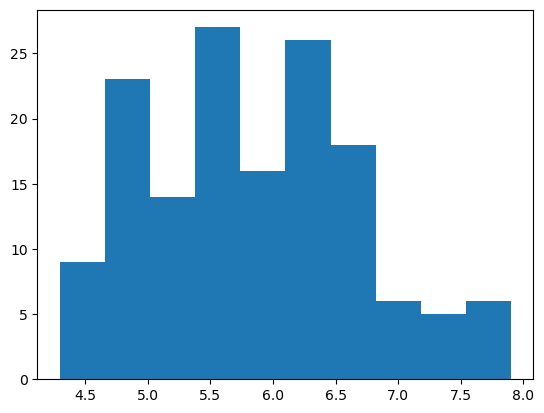

In [9]:
plt.hist(df_Iris['SepalLengthCm'])

(array([ 4.,  7., 22., 24., 38., 31.,  9., 11.,  2.,  2.]),
 array([2.  , 2.24, 2.48, 2.72, 2.96, 3.2 , 3.44, 3.68, 3.92, 4.16, 4.4 ]),
 <BarContainer object of 10 artists>)

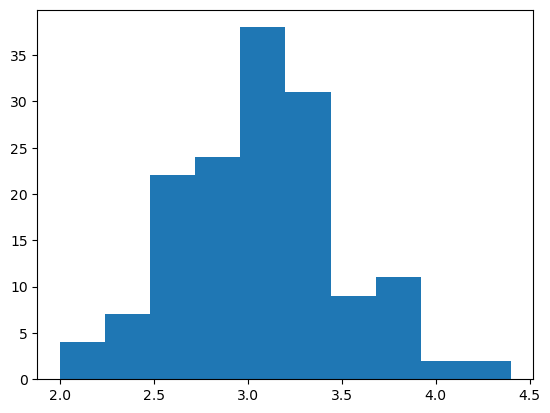

In [10]:
plt.hist(df_Iris['SepalWidthCm'])

(array([37., 13.,  0.,  3.,  8., 26., 29., 18., 11.,  5.]),
 array([1.  , 1.59, 2.18, 2.77, 3.36, 3.95, 4.54, 5.13, 5.72, 6.31, 6.9 ]),
 <BarContainer object of 10 artists>)

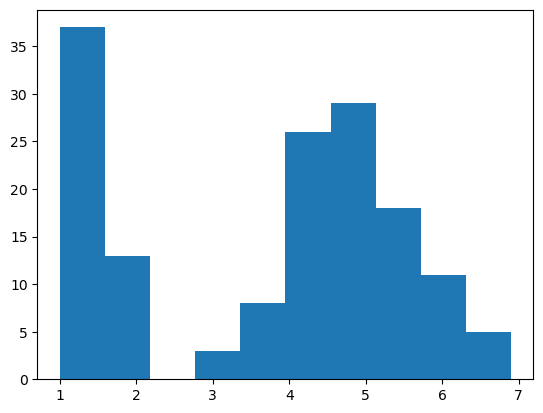

In [11]:
plt.hist(df_Iris['PetalLengthCm'])

(array([41.,  8.,  1.,  7.,  8., 33.,  6., 23.,  9., 14.]),
 array([0.1 , 0.34, 0.58, 0.82, 1.06, 1.3 , 1.54, 1.78, 2.02, 2.26, 2.5 ]),
 <BarContainer object of 10 artists>)

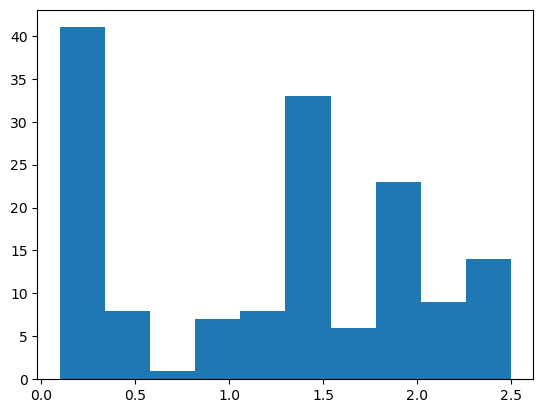

In [12]:
plt.hist(df_Iris['PetalWidthCm'])

### Plotting points with different colors for species

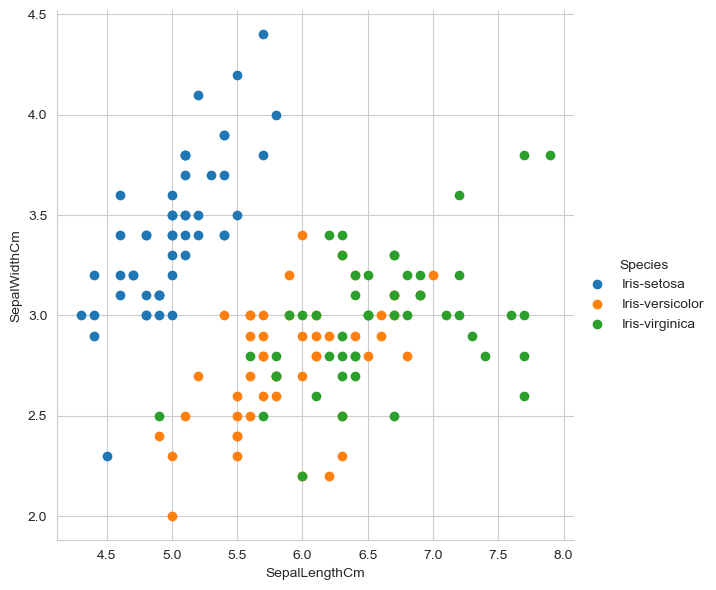

In [13]:
sns.set_style("whitegrid");
g1=sns.FacetGrid(df_Iris,hue='Species', height = 6)
g1.map(plt.scatter, "SepalLengthCm", "SepalWidthCm")
g1.add_legend()
plt.show()

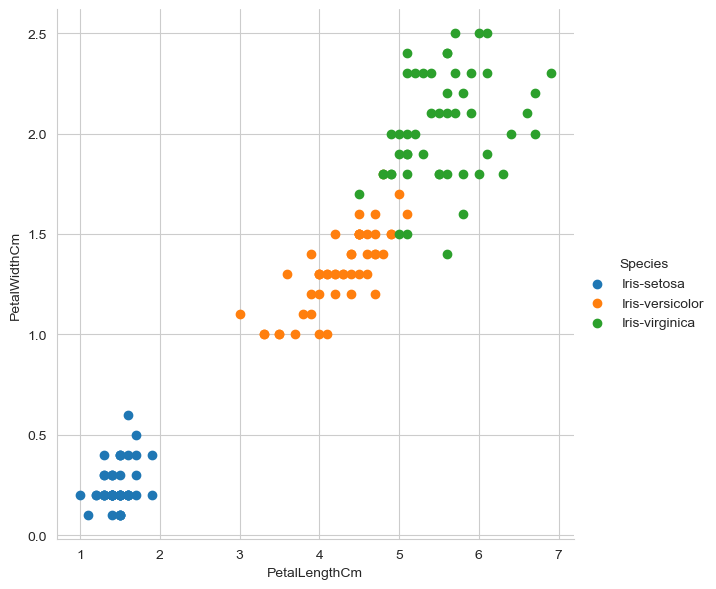

In [14]:
sns.set_style("whitegrid");
g2=sns.FacetGrid(df_Iris,hue='Species', height = 6)
g2.map(plt.scatter, "PetalLengthCm", "PetalWidthCm")
g2.add_legend();
plt.show()

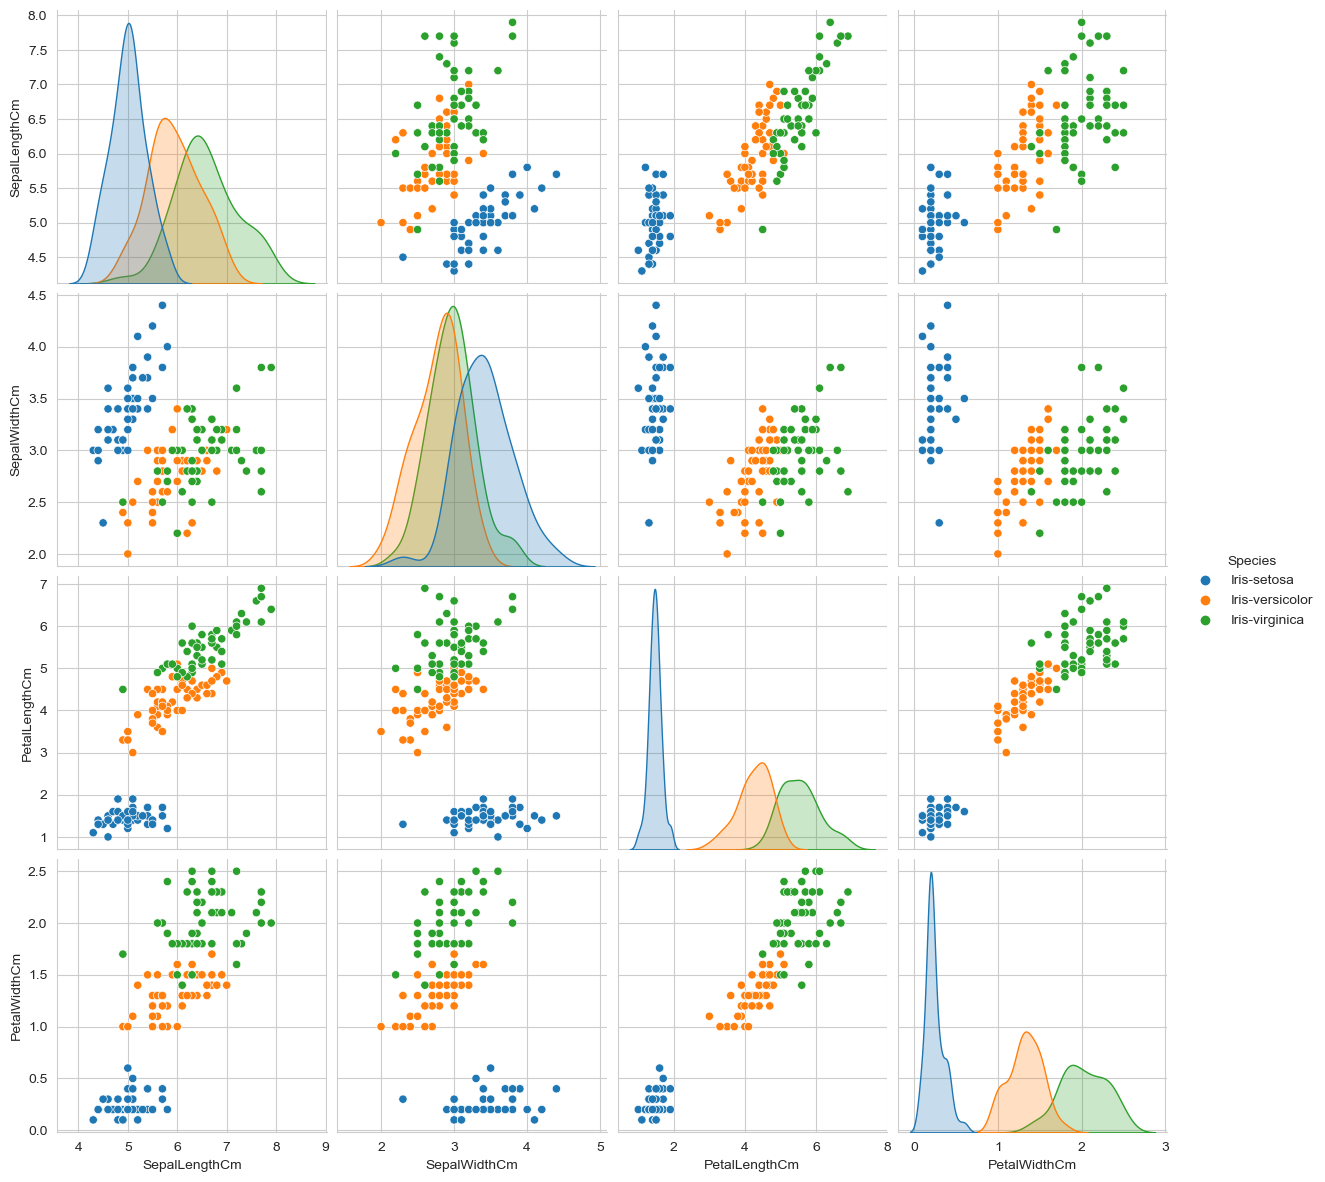

In [15]:
sns.pairplot(df_Iris, hue='Species', height= 3)

<Axes: >

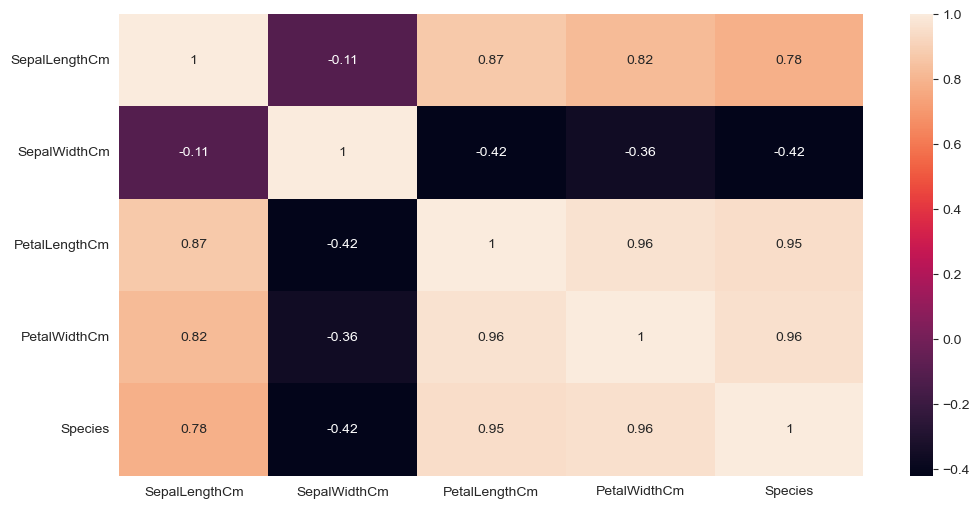

In [16]:
df_Iris['Species']=LabelEncoder().fit_transform(df_Iris['Species'])
fig_Iris=plt.figure(figsize=(12,6),dpi=100)
sns.heatmap(df_Iris.corr(),annot =True)

In [17]:
Spe_Iris = df_Iris['Species']
nSpe_Iris = df_Iris.drop(['Species'],axis = 1)
print(nSpe_Iris)
print(Spe_Iris)

     SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
0              5.1           3.5            1.4           0.2
1              4.9           3.0            1.4           0.2
2              4.7           3.2            1.3           0.2
3              4.6           3.1            1.5           0.2
4              5.0           3.6            1.4           0.2
..             ...           ...            ...           ...
145            6.7           3.0            5.2           2.3
146            6.3           2.5            5.0           1.9
147            6.5           3.0            5.2           2.0
148            6.2           3.4            5.4           2.3
149            5.9           3.0            5.1           1.8

[150 rows x 4 columns]
0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: Species, Length: 150, dtype: int32


In [18]:
train_nSpe_Iris,test_nSpe_Iris, train_Spe_Iris, test_Spe_Iris = train_test_split(nSpe_Iris,Spe_Iris, test_size=0.25)

Model_Iris = KNeighborsClassifier()
Model_Iris.fit(train_nSpe_Iris,train_Spe_Iris)

predict_Spe_Iris = Model_Iris.predict(test_nSpe_Iris)

In [19]:
print('Accuracy : ', Model_Iris.score(test_nSpe_Iris,test_Spe_Iris))

Accuracy :  0.9736842105263158


In [20]:
print(metrics.classification_report(test_Spe_Iris,predict_Spe_Iris))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.91      1.00      0.95        10
           2       1.00      0.93      0.97        15

    accuracy                           0.97        38
   macro avg       0.97      0.98      0.97        38
weighted avg       0.98      0.97      0.97        38

